# MNIST Pre-Extracted Features Continued Training
The original MNIST consists of 28x28 pixel images labelled from digits 0 - 9,
We already have features extracted using a CNN with reduced feature space of 4

The features are ensured to be trainable and not directly reveal the target class

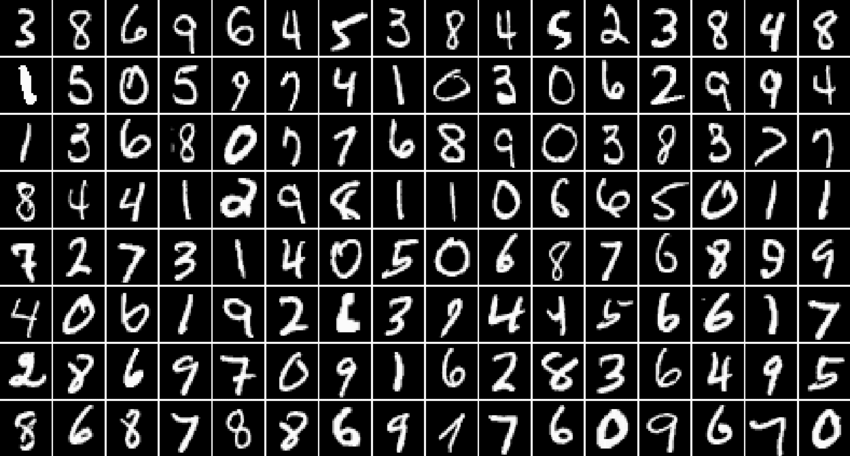

## Importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Load dataset
file_path = '/kaggle/input/mnist-inter/intermediate_features.csv'
df = pd.read_csv(file_path)
df

,0,1,2,3,target
0,-22.488626,20.202270,0.305306,-10.453532,5
1,24.169428,-25.578129,-2.417131,-13.726481,0
2,8.678675,-7.020916,-5.861809,31.030586,4
3,-2.825501,7.272360,18.584680,14.273878,1
4,-4.174079,-16.652365,9.289734,16.938232,9
...,...,...,...,...,...
59995,-33.869957,-8.456866,-3.485958,-5.452935,8
59996,-19.708601,12.889762,13.538422,-20.304987,3
59997,-27.726748,20.574360,-5.928763,1.638540,5
59998,5.012345,-9.650957,-47.262410,-10.322621,6


## EDA

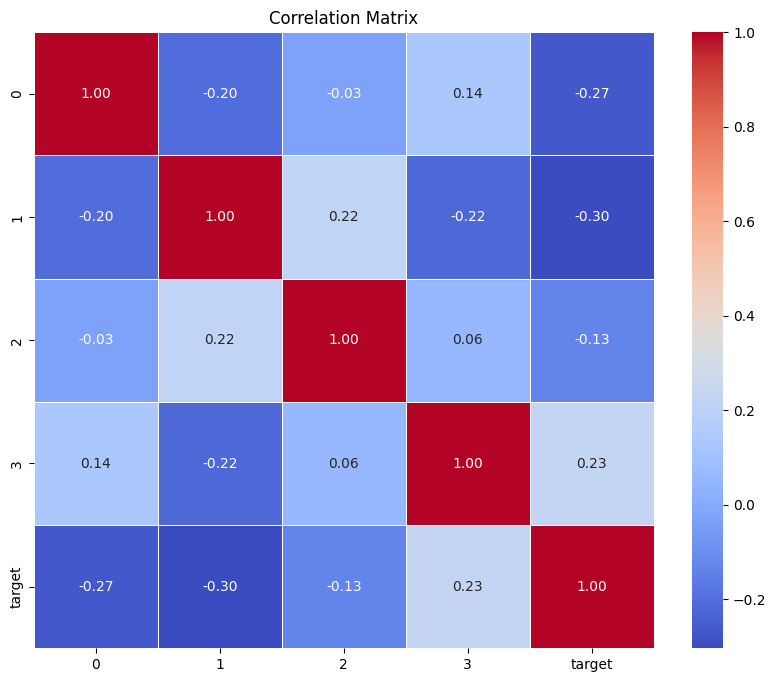

In [3]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

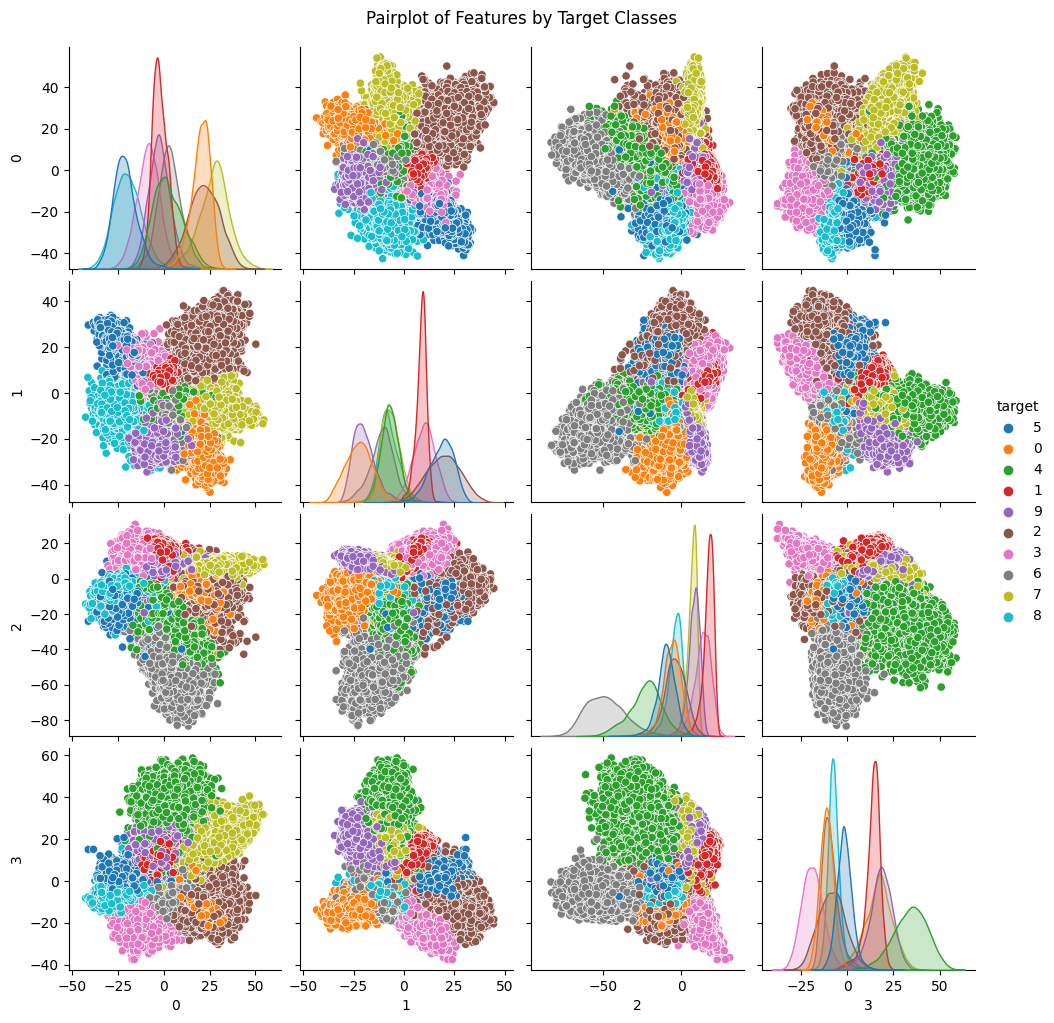

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/kaggle/input/mnist-inter/intermediate_features.csv'
df = pd.read_csv(file_path)

# Add target column as categorical for better pairplot
df['target'] = df['target'].astype(str)

# Pairplot to visualize feature relationships with respect to target classes
sns.pairplot(df, hue='target', palette='tab10')
plt.suptitle('Pairplot of Features by Target Classes', y=1.02)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

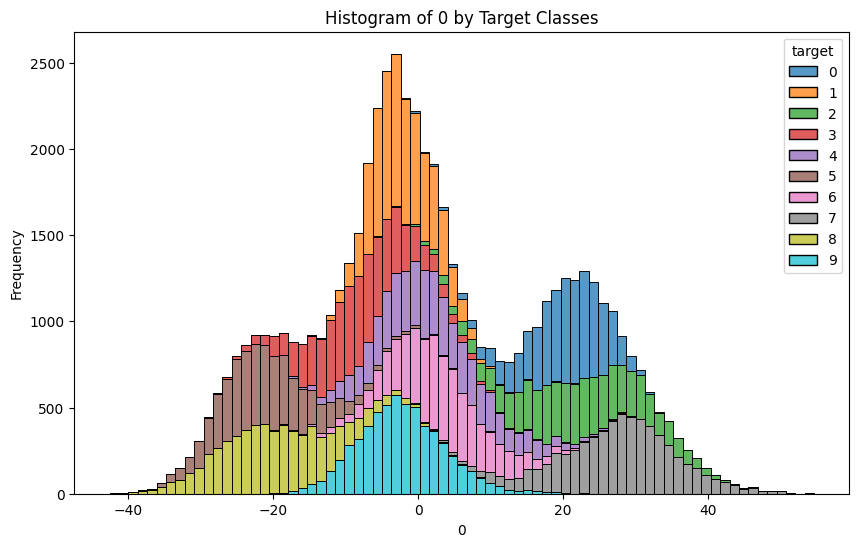

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

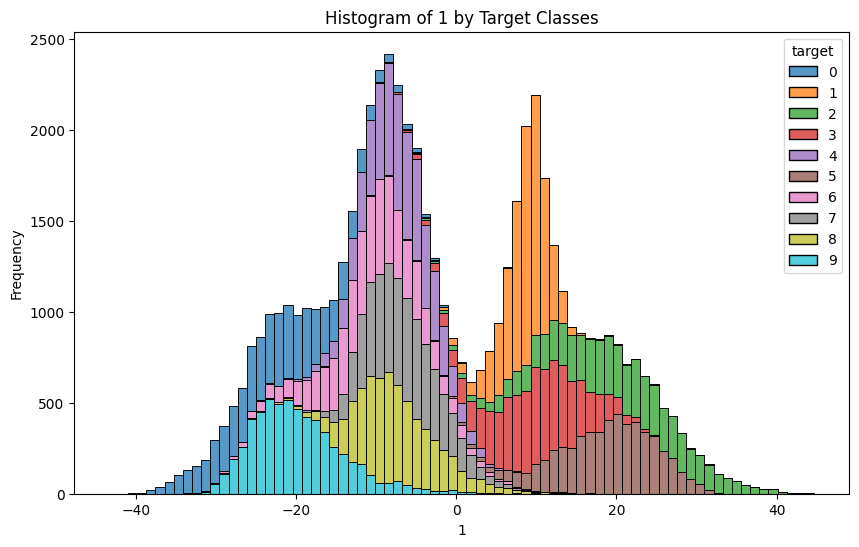

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

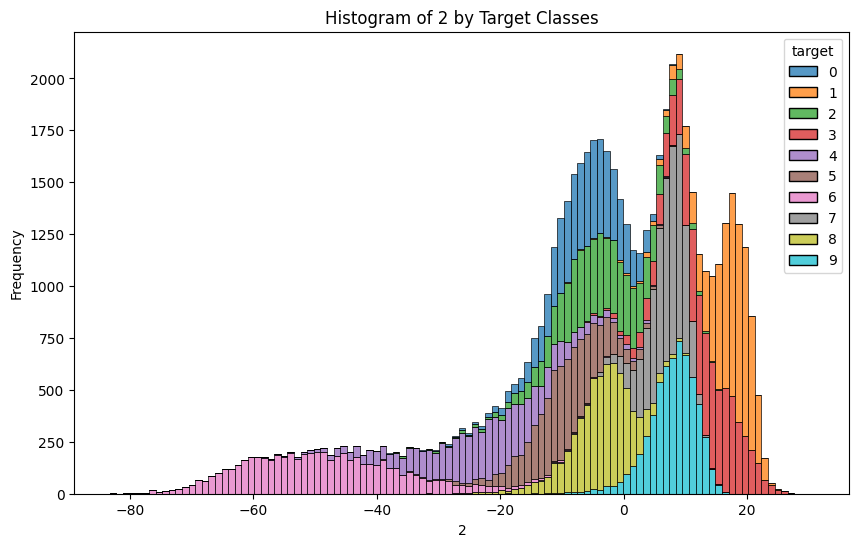

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

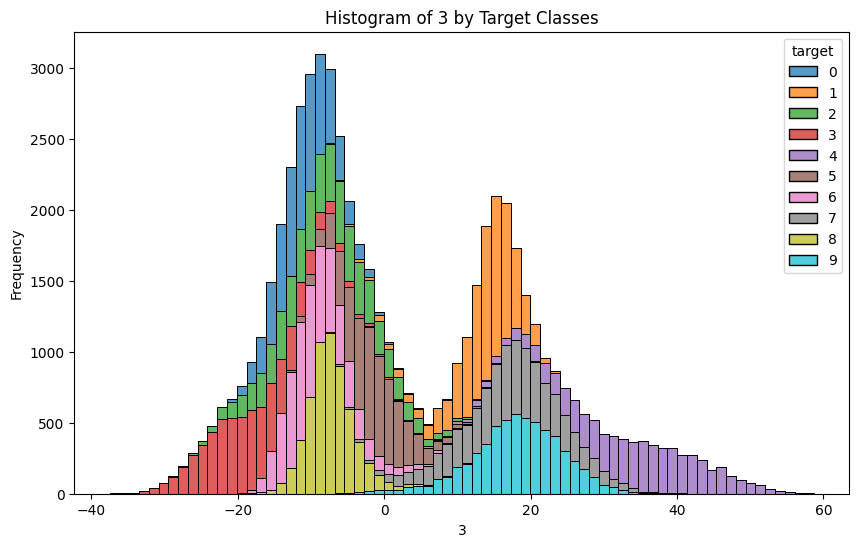

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/kaggle/input/mnist-inter/intermediate_features.csv'
df = pd.read_csv(file_path)

# Create histograms for each feature, colored by target class
features = df.columns[:-1]  # Excluding the target column
target = 'target'

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue=target, multiple='stack', palette='tab10')
    plt.title(f'Histogram of {feature} by Target Classes')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


## Funcitonal blocks for the model

In [6]:
def load_data(file_path, test_size=0.2):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)
    
    train_loader = data.DataLoader(data.TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
    test_loader = data.DataLoader(data.TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)
    
    return train_loader, test_loader, X_test, y_test


In [7]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 50)
        self.fc2 = nn.Linear(50, 10)
        self.out = nn.Linear(10, 10)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x


In [8]:
from tqdm import tqdm

def train_model(model, train_loader, test_loader, epochs=20, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    start_time = time.time()
    
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        # TQDM progress bar for training
        with tqdm(train_loader, unit="batch") as tepoch:
            for inputs, labels in tepoch:
                tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
                tepoch.set_postfix(loss=running_loss / len(train_loader), accuracy=100 * correct / total)

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)
        
        # TQDM progress bar for testing/validation
        test_loss, correct, total = validate_model(model, test_loader, criterion)
        test_losses.append(test_loss)
        test_accuracies.append(100 * correct / total)

    end_time = time.time()
    comp_time = end_time - start_time
    
    return train_losses, test_losses, train_accuracies, test_accuracies, comp_time


In [9]:
def validate_model(model, test_loader, criterion):
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    
    # TQDM progress bar for testing
    with tqdm(test_loader, unit="batch", leave=False) as ttest:
        with torch.no_grad():
            for inputs, labels in ttest:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                ttest.set_postfix(loss=test_loss / len(test_loader), accuracy=100 * correct / total)
    
    return test_loss / len(test_loader), correct, total

# 5. Evaluate the Model
def evaluate_model(model, test_loader):
    model.eval()
    y_pred, y_true = [], []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    sensitivity = recall
    specificity = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
    error_rate = 1 - accuracy
    
    return accuracy, precision, recall, f1, sensitivity, specificity, error_rate, conf_matrix

# 6. Plotting Functions
def plot_losses_accuracies(train_losses, test_losses, train_accuracies, test_accuracies):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



### To plot actual firing of neurons inside the ANN

In [10]:
import torch
import matplotlib.pyplot as plt

def plot_activations(model, input_data):
    model.eval()
    activations = {}

    def get_activation(name):
        def hook(model, input, output):
            activations[name] = output.detach().cpu().numpy()
        return hook
    
    # Register hooks for all layers dynamically
    for name, layer in model.named_children():
        layer.register_forward_hook(get_activation(name))
    
    # Forward pass
    _ = model(input_data)
    
    # Plot activations
    for layer_name, activation in activations.items():
        plt.figure(figsize=(10, 3))
        plt.imshow(activation, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Activation: {layer_name}')
        plt.show()

### main function to run the model

In [11]:
def run_model(model, epochs = 4):
    train_loader, test_loader, X_test, y_test = load_data('/kaggle/input/mnist-inter/intermediate_features.csv')
    
    # Move model to device
    model = model.to(device)
    
    # Train and validate the model
    train_losses, test_losses, train_accuracies, test_accuracies, comp_time = train_model(model, train_loader, test_loader, epochs)
    
    # Plot train/test losses and accuracies
    plot_losses_accuracies(train_losses, test_losses, train_accuracies, test_accuracies)
    
    # Evaluate the model
    accuracy, precision, recall, f1, sensitivity, specificity, error_rate, conf_matrix = evaluate_model(model, test_loader)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Computational Time: {comp_time:.2f} seconds")
    
    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix)
    
    # Plot activations for a sample input
    sample_input = torch.tensor(X_test[:1], dtype=torch.float32).to(device)
    plot_activations(model, sample_input)

## Calling functional blocks to run the model

Running SimpleNN Model


Epoch 4/4: 100%|██████████| 750/750 [00:04<00:00, 169.13batch/s, accuracy=97.4, loss=0.0865]


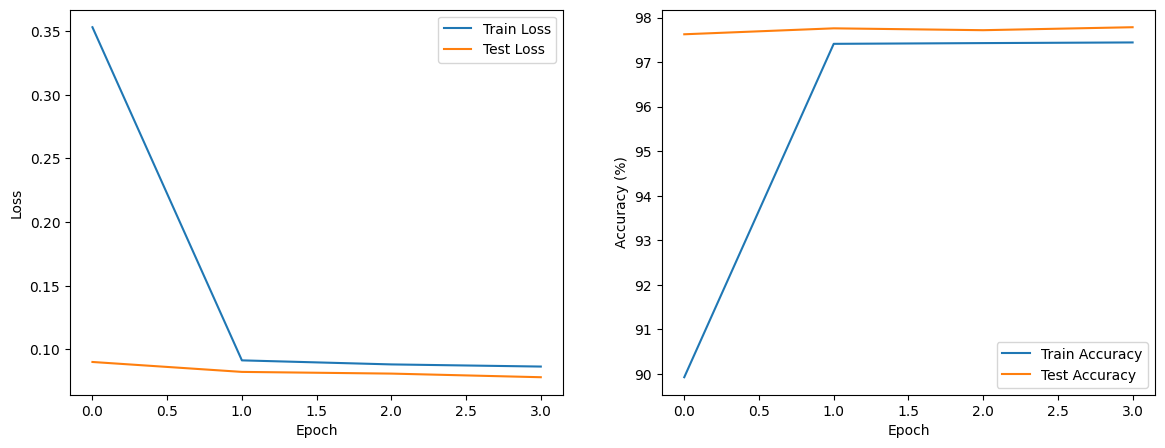

Accuracy: 0.9778
Precision: 0.9779
Recall (Sensitivity): 0.9778
F1 Score: 0.9778
Specificity: 0.9778
Error Rate: 0.0222
Computational Time: 19.93 seconds


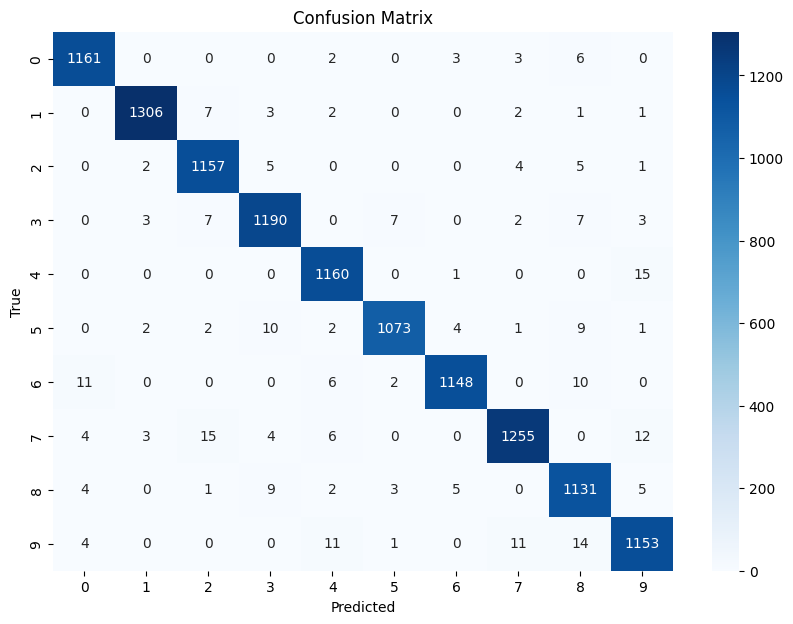

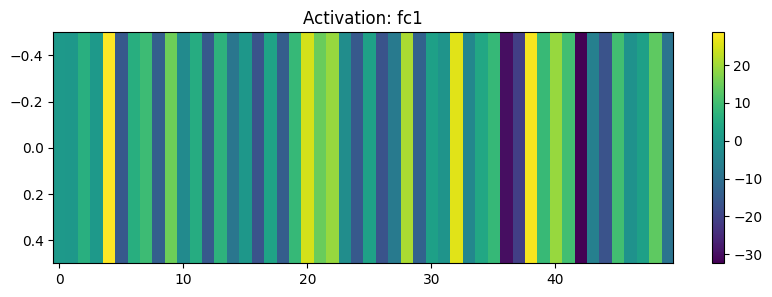

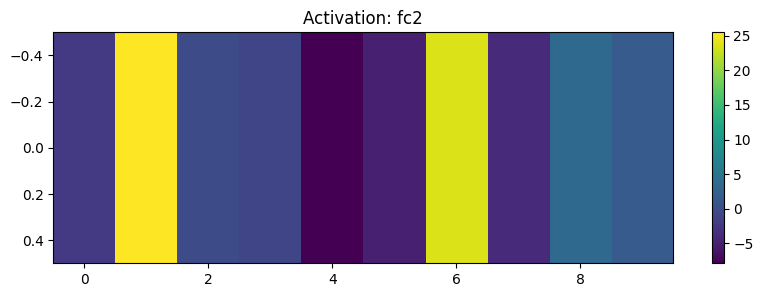

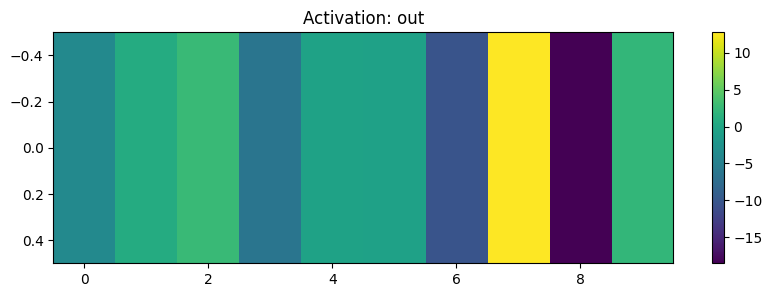

In [12]:
simple_model = SimpleNN()
print("Running SimpleNN Model")
run_model(simple_model)